# Apprentissage Supervisé - Régression

*Lorenzo Brucato - Alexandre Loret*
___

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# fonctions pour la regression
from RegFunctions import *

## 1. Chargement, pré traitement des données et visualisation

In [4]:
train = pd.read_parquet("data/train.parquet") # jeu de données d'entrainement
test = pd.read_parquet("data/test.parquet")   # jeu de données de prévision

In [25]:
n, p = train.shape
print(n, p) # 100000 données d'entrainement pour 20 variables

100000 20


### 1.1 Valeurs manquantes

Pas de valeurs manquantes dans les données :

In [26]:
print(pd.isna(train).sum().sum())
# pas de valeurs manquantes

print(pd.isna(test).sum().sum())


0
0


*Mais existence de valeurs aberrantes corrigées plus loin*

In [27]:
print(len(train.loc[train['RatecodeID'] == 6.0]))
print(len(test.loc[test['RatecodeID'] == 6.0]))

0
1


RatecodeID ne possède pas de données d'exemples sur la partie train pour la modalité 6.0 (GroupRide). La valeur 6.0 sera attribué pour les valeurs aberrantes et/ou inconnues de la variable 

### 1.2 Analyse des variables explicatives

**Description des variables :**

*Variables explicatives :* 
- `VendorID` : identifiant du fournisseur (1:creative mobile, 2:VeriFone)
- `tpep_pickup_datetime` : date et heure de début de course
- `tpep_dropoff_datetime` : date et heure de fin de course
- `passenger_count` : nombre de passagers de la course
- `trip_distance` : distance de la course
- `PU_location_lat` : latitude (départ)
- `PU_location_lon` : longitude (départ)
- `DO_location_lat` : latitude (arrivée)
- `DO_location_lon` : longitude (arrivée)
- `RatecodeID` : type de tarif (1:standard, 2:JFK, 3:Newark, 4:Nassau or Westchester, 5:Negociated fare, 6:Group ride)
- `store_and_fwd_flag` : données stockées en interne sur le véhicule en cas de non connexion au réseau
- `payment_type` : type de paiement (1:CB, 2:cash, 3:no charge, 4:dispute, 5:inconnu, 6:voided trip)
- `fare_amount` : tarif de la course (dépendance distance + temps)
- `extra` : montant des extras
- `mta_tax` : taxe MTA
- `improvment_surcharge` : taxe additionelle
- `tolls_amount` : montant des péages
- `congestion_surcharge` : taxe additionelle
- `Airport_fee` : frais d'aéroport

*Variable cible :*
-  `tip_amount` : montant des pourboires

#### 1.2.1 Description des variables et valeurs aberrantes

In [28]:
train.describe()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,congestion_surcharge,Airport_fee,PU_location_lat,PU_location_lon,DO_location_lat,DO_location_lon
count,100000.000000,100000,100000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.759540,2024-01-17 01:37:59.341700,2024-01-17 01:53:39.024740,1.335090,3.213008,1.998210,1.186610,18.044264,1.538507,0.497315,3.430985,0.525877,0.999882,2.335125,0.140857,40.752187,-73.965628,40.754760,-73.971940
min,1.000000,2023-12-31 23:56:46,2024-01-01 00:03:50,0.000000,0.010000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,40.576961,-74.174002,40.528686,-74.187679
25%,2.000000,2024-01-09 15:34:38,2024-01-09 15:50:20.750000,1.000000,1.000000,1.000000,1.000000,8.600000,0.000000,0.500000,1.000000,0.000000,1.000000,2.500000,0.000000,40.740439,-73.989845,40.740337,-73.989845
50%,2.000000,2024-01-17 11:32:54.500000,2024-01-17 11:51:50,1.000000,1.690000,1.000000,1.000000,12.800000,1.000000,0.500000,2.800000,0.000000,1.000000,2.500000,0.000000,40.758028,-73.977698,40.758028,-73.977698
75%,2.000000,2024-01-24 18:09:36,2024-01-24 18:28:48.500000,1.000000,3.100000,1.000000,1.000000,19.800000,2.500000,0.500000,4.200000,0.000000,1.000000,2.500000,0.000000,40.773633,-73.965146,40.773633,-73.961764
max,2.000000,2024-01-31 23:59:07,2024-02-01 10:57:24,7.000000,53.640000,99.000000,4.000000,214.800000,11.750000,0.500000,99.000000,49.260000,1.000000,2.500000,1.750000,40.899528,-73.726655,40.899528,-73.711025
std,0.427365,NaN,NaN,0.847745,4.219928,9.594546,0.458398,15.839824,1.788004,0.036542,3.686474,2.020583,0.009412,0.620490,0.476090,0.032148,0.048564,0.031182,0.036295


In [29]:
# proportion de valeurs aberrantes sur ratecodeID
print(len(train.loc[train['RatecodeID'] >= 6.0])/len(train))
print(len(test.loc[test['RatecodeID'] >= 6.0])/len(test))

0.00968
0.009918303508385282


 D'après la description on sait que les variables `VendorID`, `RatecodeID`, `store_and_fwd_flag` et `payment_type` sont catégorielles.

 A noter :
 
- pour `payment_type`, les catégories ne vont pas au dela de cinq (pas de données pour les modes de paiements 'inconnu' et 'voided_trip')
- pour `RatecodeID`, des valeurs hors classe atteignent 99.0, la valeur 6.0 n'est visible que sur le jeu de test --> 6.0 devient une catégorie supplémentaire 'inconnue' 

In [30]:
train.loc[train['RatecodeID'] >= 6.0, 'RatecodeID'] = 6.0
test.loc[test['RatecodeID'] >= 6.0, 'RatecodeID'] = 6.0

#### 1.2.2 variables catégorielles

On transforme les variables catégorielles en vecteurs one-hot (avec suppression de la première colonne pour préserver l'identifiabilité du plan d'expérience) :

In [31]:
train = pd.get_dummies(train, columns=['VendorID', 'RatecodeID', 'store_and_fwd_flag', 'payment_type'], drop_first=True, dtype=int)
test = pd.get_dummies(test, columns=['VendorID', 'RatecodeID', 'store_and_fwd_flag', 'payment_type'], drop_first=True, dtype=int)

In [32]:
train

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,...,VendorID_2,RatecodeID_2.0,RatecodeID_3.0,RatecodeID_4.0,RatecodeID_5.0,RatecodeID_6.0,store_and_fwd_flag_Y,payment_type_2,payment_type_3,payment_type_4
0,2024-01-15 20:37:28,2024-01-15 20:56:43,1.0,3.30,19.1,3.5,0.5,4.80,0.0,1.0,...,0,0,0,0,0,0,0,0,0,0
1,2024-01-25 19:41:24,2024-01-25 19:44:42,1.0,0.72,5.8,2.5,0.5,2.46,0.0,1.0,...,1,0,0,0,0,0,0,0,0,0
2,2024-01-25 15:48:48,2024-01-25 16:24:23,2.0,7.45,38.7,0.0,0.5,3.00,0.0,1.0,...,1,0,0,0,0,0,0,0,0,0
3,2024-01-27 00:47:26,2024-01-27 00:55:55,1.0,1.53,10.0,1.0,0.5,2.25,0.0,1.0,...,1,0,0,0,0,0,0,0,0,0
4,2024-01-28 13:14:26,2024-01-28 13:22:34,1.0,1.53,10.0,0.0,0.5,3.50,0.0,1.0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,2024-01-19 09:12:12,2024-01-19 09:38:07,1.0,4.38,26.1,0.0,0.5,3.00,0.0,1.0,...,1,0,0,0,0,0,0,0,0,0
99996,2024-01-25 00:07:40,2024-01-25 00:25:13,1.0,5.34,25.4,1.0,0.5,6.08,0.0,1.0,...,1,0,0,0,0,0,0,0,0,0
99997,2024-01-08 09:27:23,2024-01-08 10:01:52,1.0,10.10,35.5,0.0,0.5,0.00,0.0,1.0,...,0,0,0,0,0,1,0,0,0,0
99998,2024-01-06 18:42:49,2024-01-06 19:23:57,1.0,5.82,36.6,0.0,0.5,0.00,0.0,1.0,...,1,0,0,0,0,0,0,1,0,0


#### 1.2.3 Extraction/traitement des dates

**calcul de la durée des trajets :**

On récupère la durée en secondes du trajet en faisant la différence des dates fournises (dropoff et pickup) pour créer une nouvelles variables `duration` :

In [33]:
train['duration'] = (pd.to_datetime(train['tpep_dropoff_datetime']) - pd.to_datetime(train['tpep_pickup_datetime'])).dt.seconds
test['duration'] = (pd.to_datetime(test['tpep_dropoff_datetime']) - pd.to_datetime(test['tpep_pickup_datetime'])).dt.seconds

# logarithme de la durée pour éviter l'écrasement des valeurs tip_amount (cf visualisation) et afficher une meilleure corrélation linéaire 
train['log_duration'] = np.log(train['duration'] + 1)
test['log_duration'] = np.log(test['duration'] + 1)

train['long_trip'] = train['duration'] > 70000
test['long_trip'] = test['duration'] > 70000

In [35]:
train

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,...,RatecodeID_4.0,RatecodeID_5.0,RatecodeID_6.0,store_and_fwd_flag_Y,payment_type_2,payment_type_3,payment_type_4,duration,log_duration,long_trip
0,2024-01-15 20:37:28,2024-01-15 20:56:43,1.0,3.30,19.1,3.5,0.5,4.80,0.0,1.0,...,0,0,0,0,0,0,0,1155,7.052721,False
1,2024-01-25 19:41:24,2024-01-25 19:44:42,1.0,0.72,5.8,2.5,0.5,2.46,0.0,1.0,...,0,0,0,0,0,0,0,198,5.293305,False
2,2024-01-25 15:48:48,2024-01-25 16:24:23,2.0,7.45,38.7,0.0,0.5,3.00,0.0,1.0,...,0,0,0,0,0,0,0,2135,7.666690,False
3,2024-01-27 00:47:26,2024-01-27 00:55:55,1.0,1.53,10.0,1.0,0.5,2.25,0.0,1.0,...,0,0,0,0,0,0,0,509,6.234411,False
4,2024-01-28 13:14:26,2024-01-28 13:22:34,1.0,1.53,10.0,0.0,0.5,3.50,0.0,1.0,...,0,0,0,0,0,0,0,488,6.192362,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,2024-01-19 09:12:12,2024-01-19 09:38:07,1.0,4.38,26.1,0.0,0.5,3.00,0.0,1.0,...,0,0,0,0,0,0,0,1555,7.349874,False
99996,2024-01-25 00:07:40,2024-01-25 00:25:13,1.0,5.34,25.4,1.0,0.5,6.08,0.0,1.0,...,0,0,0,0,0,0,0,1053,6.960348,False
99997,2024-01-08 09:27:23,2024-01-08 10:01:52,1.0,10.10,35.5,0.0,0.5,0.00,0.0,1.0,...,0,0,1,0,0,0,0,2069,7.635304,False
99998,2024-01-06 18:42:49,2024-01-06 19:23:57,1.0,5.82,36.6,0.0,0.5,0.00,0.0,1.0,...,0,0,0,0,1,0,0,2468,7.811568,False


**Heure d'arrivée :**

In [36]:
train['hour'] = (pd.to_datetime(train['tpep_dropoff_datetime'])).dt.hour + (pd.to_datetime(train['tpep_dropoff_datetime'])).dt.minute / 60
test['hour'] = (pd.to_datetime(test['tpep_dropoff_datetime'])).dt.hour + (pd.to_datetime(test['tpep_dropoff_datetime'])).dt.minute / 60

In [37]:
train

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,...,RatecodeID_5.0,RatecodeID_6.0,store_and_fwd_flag_Y,payment_type_2,payment_type_3,payment_type_4,duration,log_duration,long_trip,hour
0,2024-01-15 20:37:28,2024-01-15 20:56:43,1.0,3.30,19.1,3.5,0.5,4.80,0.0,1.0,...,0,0,0,0,0,0,1155,7.052721,False,20.933333
1,2024-01-25 19:41:24,2024-01-25 19:44:42,1.0,0.72,5.8,2.5,0.5,2.46,0.0,1.0,...,0,0,0,0,0,0,198,5.293305,False,19.733333
2,2024-01-25 15:48:48,2024-01-25 16:24:23,2.0,7.45,38.7,0.0,0.5,3.00,0.0,1.0,...,0,0,0,0,0,0,2135,7.666690,False,16.400000
3,2024-01-27 00:47:26,2024-01-27 00:55:55,1.0,1.53,10.0,1.0,0.5,2.25,0.0,1.0,...,0,0,0,0,0,0,509,6.234411,False,0.916667
4,2024-01-28 13:14:26,2024-01-28 13:22:34,1.0,1.53,10.0,0.0,0.5,3.50,0.0,1.0,...,0,0,0,0,0,0,488,6.192362,False,13.366667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,2024-01-19 09:12:12,2024-01-19 09:38:07,1.0,4.38,26.1,0.0,0.5,3.00,0.0,1.0,...,0,0,0,0,0,0,1555,7.349874,False,9.633333
99996,2024-01-25 00:07:40,2024-01-25 00:25:13,1.0,5.34,25.4,1.0,0.5,6.08,0.0,1.0,...,0,0,0,0,0,0,1053,6.960348,False,0.416667
99997,2024-01-08 09:27:23,2024-01-08 10:01:52,1.0,10.10,35.5,0.0,0.5,0.00,0.0,1.0,...,0,1,0,0,0,0,2069,7.635304,False,10.016667
99998,2024-01-06 18:42:49,2024-01-06 19:23:57,1.0,5.82,36.6,0.0,0.5,0.00,0.0,1.0,...,0,0,0,1,0,0,2468,7.811568,False,19.383333


**Week-end :**

In [38]:
train['week_end'] = (pd.to_datetime(train['tpep_dropoff_datetime'])).apply(lambda x: x.weekday() >= 5).astype(int)
test['week_end'] = (pd.to_datetime(test['tpep_dropoff_datetime'])).apply(lambda x: x.weekday() >= 5).astype(int)

**Jour du mois :**

In [39]:
train['day'] = (pd.to_datetime(train['tpep_dropoff_datetime'])).dt.day
test['day'] = (pd.to_datetime(test['tpep_dropoff_datetime'])).dt.day

In [40]:
train

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,...,store_and_fwd_flag_Y,payment_type_2,payment_type_3,payment_type_4,duration,log_duration,long_trip,hour,week_end,day
0,2024-01-15 20:37:28,2024-01-15 20:56:43,1.0,3.30,19.1,3.5,0.5,4.80,0.0,1.0,...,0,0,0,0,1155,7.052721,False,20.933333,0,15
1,2024-01-25 19:41:24,2024-01-25 19:44:42,1.0,0.72,5.8,2.5,0.5,2.46,0.0,1.0,...,0,0,0,0,198,5.293305,False,19.733333,0,25
2,2024-01-25 15:48:48,2024-01-25 16:24:23,2.0,7.45,38.7,0.0,0.5,3.00,0.0,1.0,...,0,0,0,0,2135,7.666690,False,16.400000,0,25
3,2024-01-27 00:47:26,2024-01-27 00:55:55,1.0,1.53,10.0,1.0,0.5,2.25,0.0,1.0,...,0,0,0,0,509,6.234411,False,0.916667,1,27
4,2024-01-28 13:14:26,2024-01-28 13:22:34,1.0,1.53,10.0,0.0,0.5,3.50,0.0,1.0,...,0,0,0,0,488,6.192362,False,13.366667,1,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,2024-01-19 09:12:12,2024-01-19 09:38:07,1.0,4.38,26.1,0.0,0.5,3.00,0.0,1.0,...,0,0,0,0,1555,7.349874,False,9.633333,0,19
99996,2024-01-25 00:07:40,2024-01-25 00:25:13,1.0,5.34,25.4,1.0,0.5,6.08,0.0,1.0,...,0,0,0,0,1053,6.960348,False,0.416667,0,25
99997,2024-01-08 09:27:23,2024-01-08 10:01:52,1.0,10.10,35.5,0.0,0.5,0.00,0.0,1.0,...,0,0,0,0,2069,7.635304,False,10.016667,0,8
99998,2024-01-06 18:42:49,2024-01-06 19:23:57,1.0,5.82,36.6,0.0,0.5,0.00,0.0,1.0,...,0,1,0,0,2468,7.811568,False,19.383333,1,6


In [18]:
# train.to_parquet('data/modified/train_modified.parquet', index=False)
# test.to_parquet('data/modified/test_modified.parquet', index=False)

### 1.3 Visualisation

**Matrice de corrélation :**

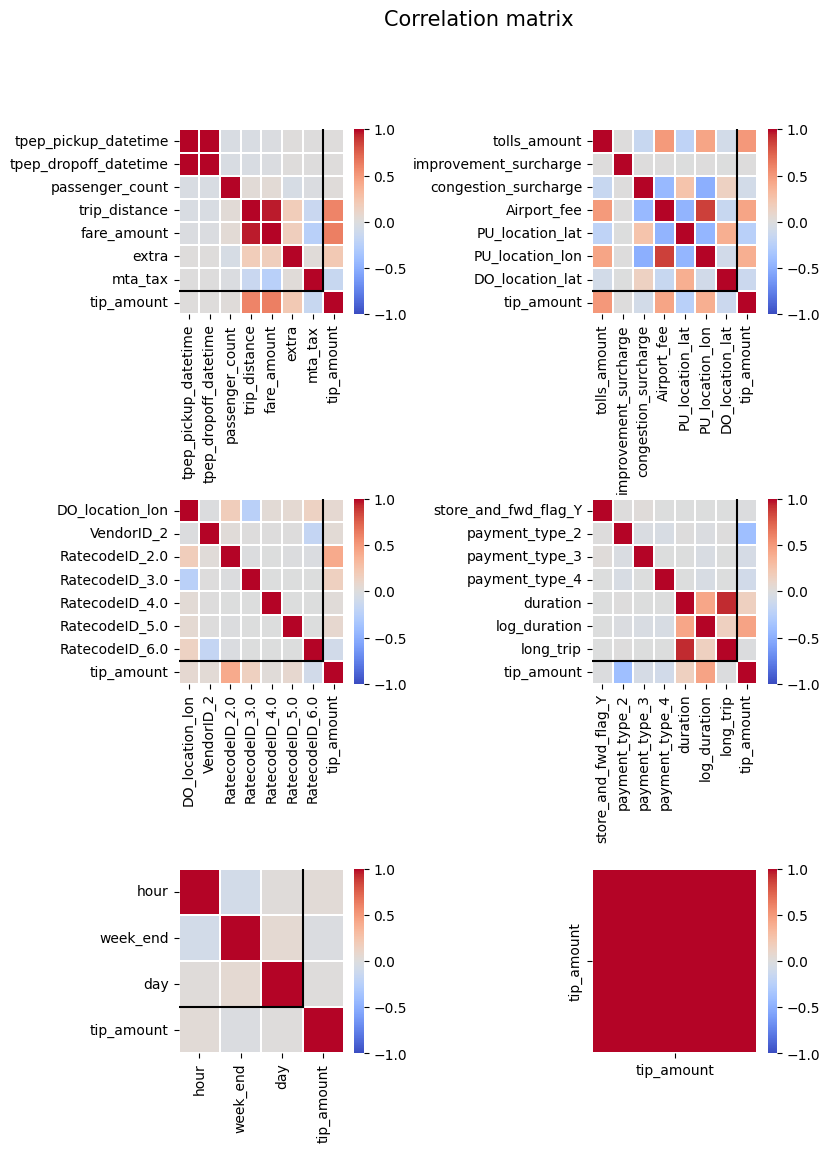

In [41]:
corrplot(train, 'tip_amount')

**Tip_amount en fonction de duration**

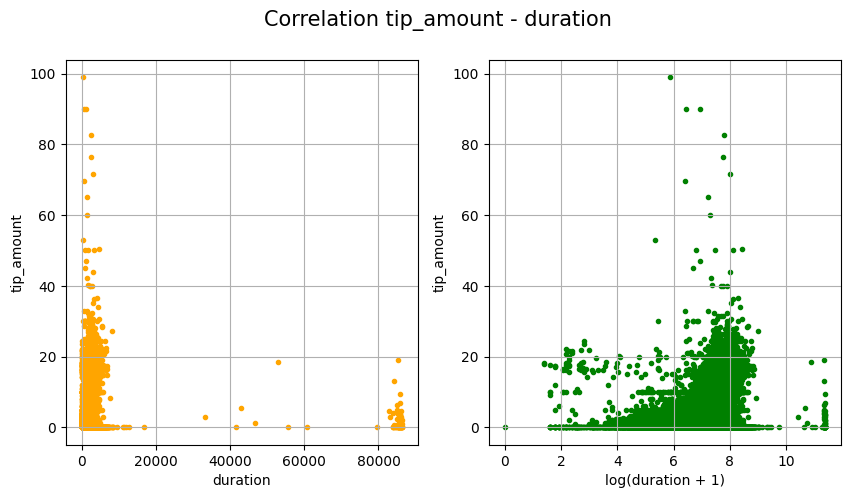

In [20]:
biScatterPlot('duration', 'tip_amount', train)

**Tip_amount en fonction de trip_distance :**

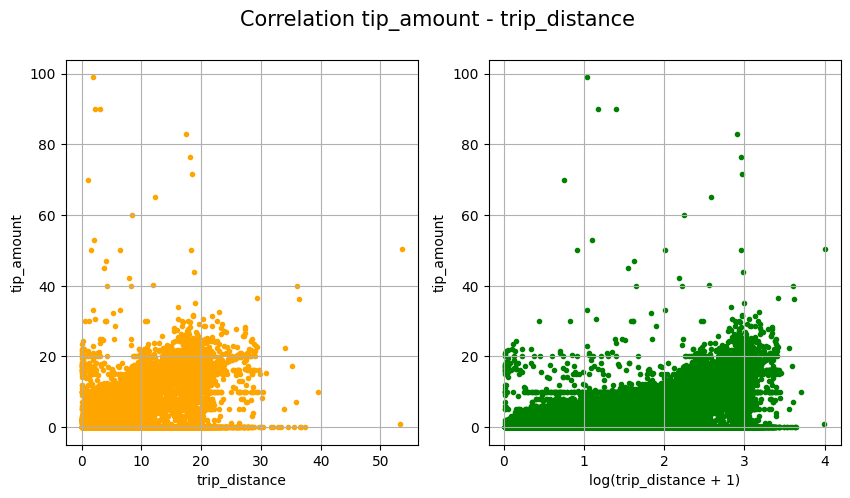

In [21]:
biScatterPlot('trip_distance', 'tip_amount', train)

**Tip_amount en fonction de fare_amount :**

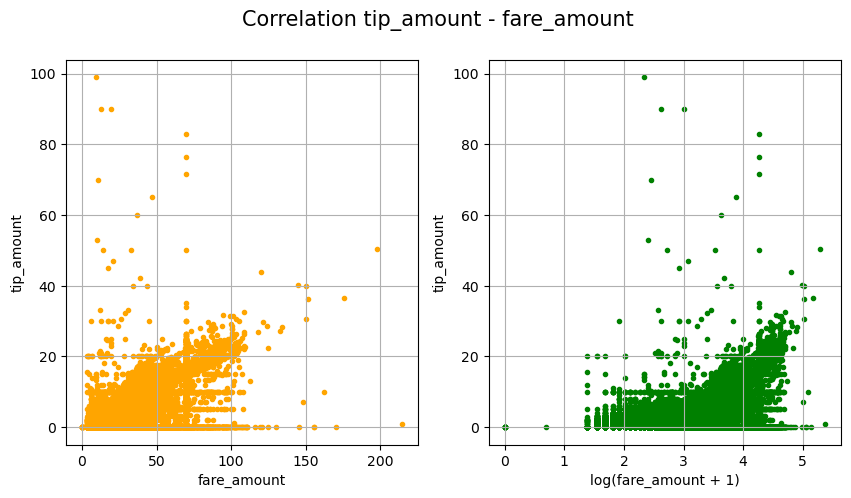

In [316]:
biScatterPlot('fare_amount', 'tip_amount', train)

**Tip_amount en fonction de tolls_amount :**

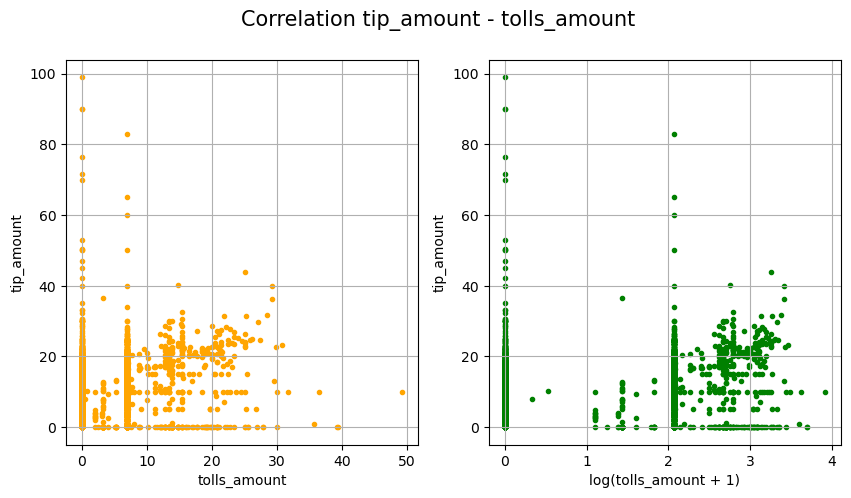

In [318]:
biScatterPlot('tolls_amount', 'tip_amount', train)

**Tip_amount en fonction de la localisation du début/fin de course :**

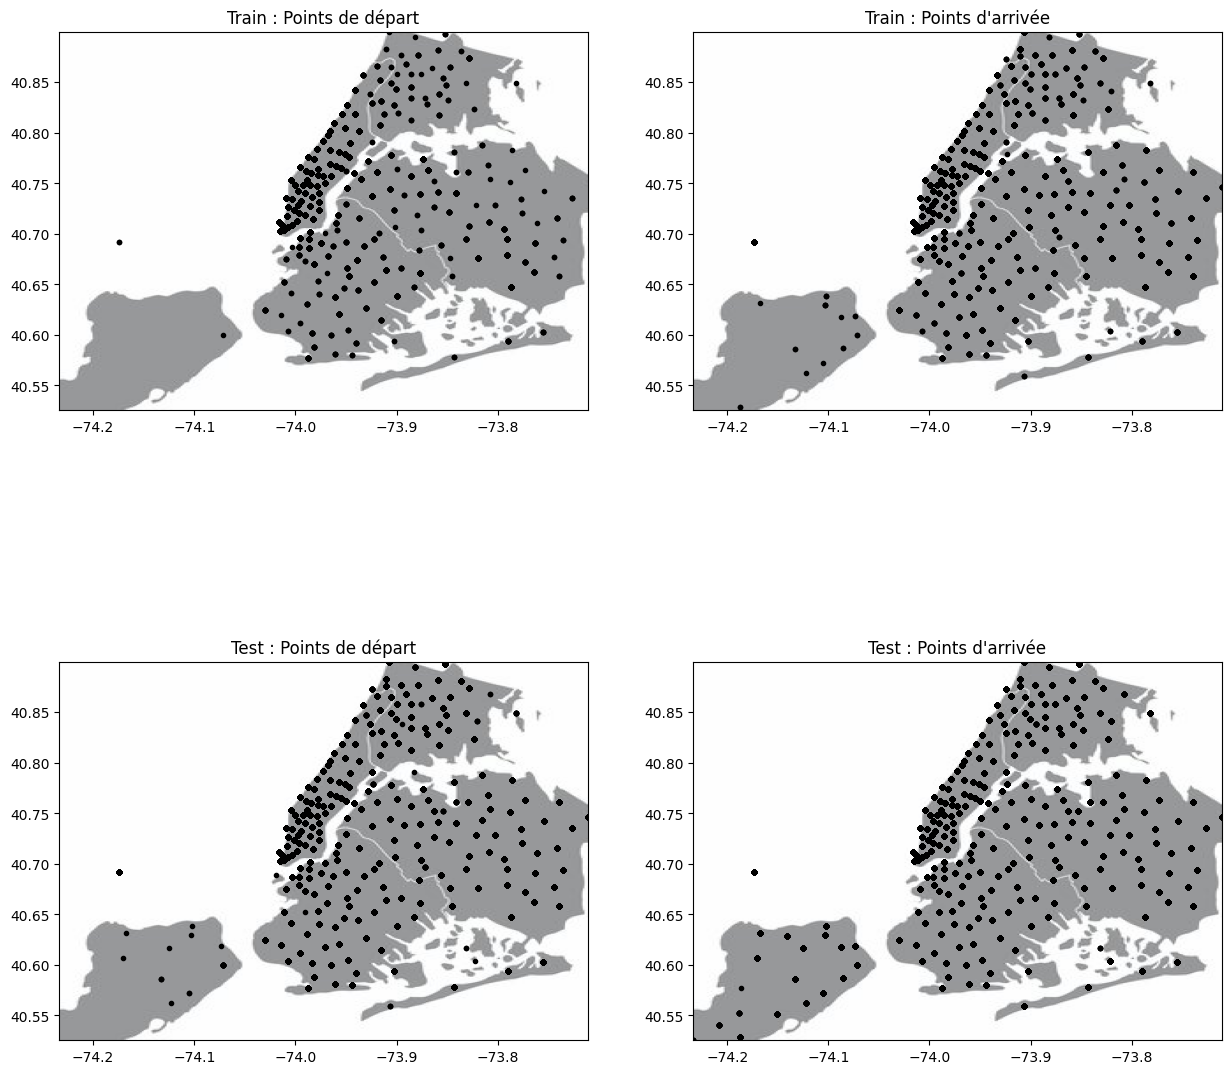

In [19]:
imgNYC = plt.imread("data/map.jpg")

mapNYC(train, test, imgNYC)

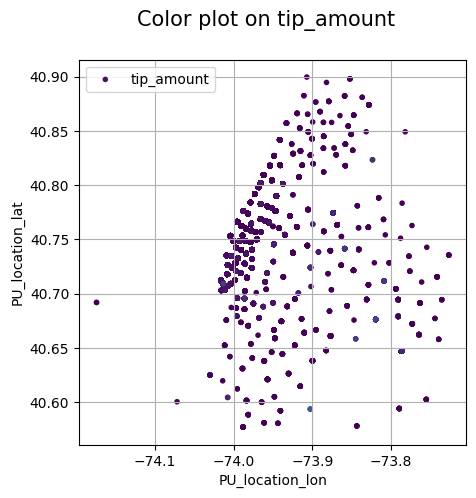

In [20]:
colorScatterPlot('PU_location_lon', 'PU_location_lat', 'tip_amount', train)

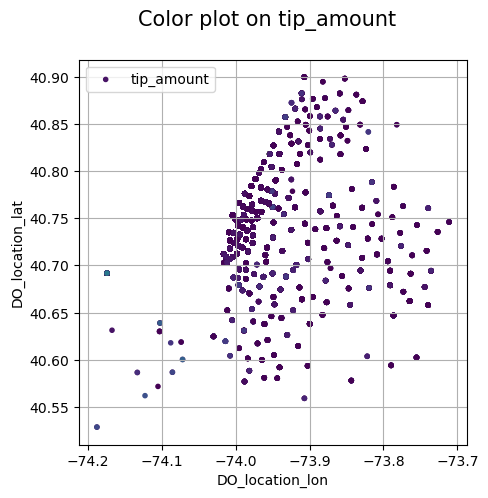

In [321]:
colorScatterPlot('DO_location_lon', 'DO_location_lat', 'tip_amount', train)

## 2. Analyse des modèles prédictifs

**Métriques de mesure de performance et recherche d'hyperparamètres par validation croisée :**

In [42]:
# recherche d'hyperparamètres par validation croisée
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, r2_score, mean_squared_error, mean_absolute_percentage_error
def RMSE(y_true, y_pred): return np.sqrt(mean_squared_error(y_true, y_pred))

scoring = {
    'r2': make_scorer(r2_score, greater_is_better=True),
    'rmse': make_scorer(RMSE, greater_is_better=False),
}

**Train, test split et standardisation des données :**

In [43]:
Xtrain, Ytrain = train.drop(['tpep_dropoff_datetime', 'tpep_pickup_datetime', 'tip_amount'], axis=1), train['tip_amount']
Xtest = test.drop(['tpep_dropoff_datetime', 'tpep_pickup_datetime'], axis=1)

In [44]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

Xtrain = scaler.fit_transform(Xtrain)
Xtest = scaler.transform(Xtest)

### 2.1 Regression linéaire

In [45]:
from sklearn.linear_model import LinearRegression

In [335]:
LinearModel = LinearRegression()

LM_CV = GridSearchAnalysis(LinearModel, Xtrain, Ytrain, scoring)

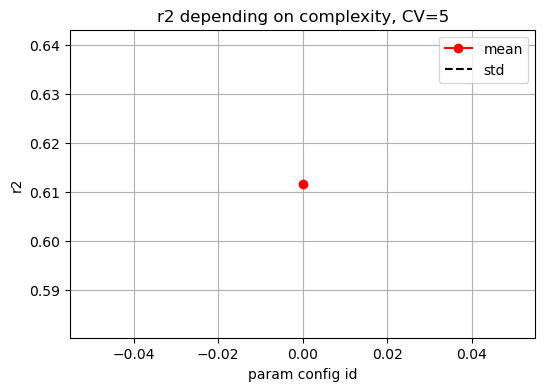

In [337]:
LM_CV.plot_score()

In [348]:
LM_CV.score_table()

,fit_time,r2,rmse
0,0.035 ± 0.003,0.612 ± 0.029,2.297 ± 0.139


### 2.2 Régularisation

In [351]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet

**Ridge (L2 - réduction des poids) :**

In [354]:
RidgeModel = Ridge()

param_grid = {
    "alpha":[1e-3, 0.01, 0.05, 0.1, 0.5, 1.0, 5.0, 10]
}

Ridge_CV = GridSearchAnalysis(RidgeModel, Xtrain, Ytrain, scoring, param_grid=param_grid)

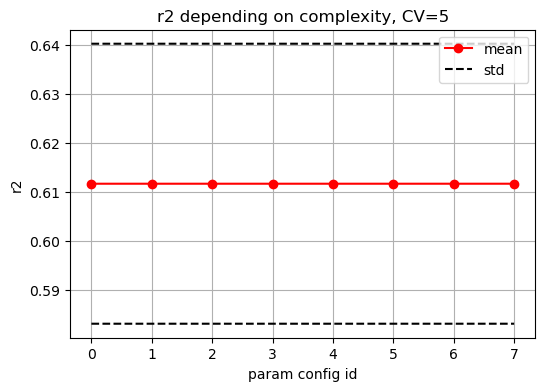

In [355]:
Ridge_CV.plot_score()

In [356]:
Ridge_CV.score_table()

,alpha,fit_time,r2,rmse
0,0.001,0.018 ± 0.002,0.612 ± 0.029,2.297 ± 0.139
1,0.010,0.018 ± 0.001,0.612 ± 0.029,2.297 ± 0.139
2,0.050,0.018 ± 0.001,0.612 ± 0.029,2.297 ± 0.139
3,0.100,0.019 ± 0.001,0.612 ± 0.029,2.297 ± 0.139
4,0.500,0.017 ± 0.001,0.612 ± 0.029,2.297 ± 0.139
5,1.000,0.017 ± 0.001,0.612 ± 0.029,2.297 ± 0.139
6,5.000,0.017 ± 0.001,0.612 ± 0.029,2.297 ± 0.139
7,10.000,0.017 ± 0.000,0.612 ± 0.029,2.297 ± 0.139


**Lasso (L1 - sélection de variable) :** 

In [358]:
LassoModel = Lasso()

param_grid = {
    "alpha":[0.01, 0.05, 0.1, 0.5, 1.0, 5.0, 10]
}

Lasso_CV = GridSearchAnalysis(LassoModel, Xtrain, Ytrain, scoring, param_grid=param_grid)

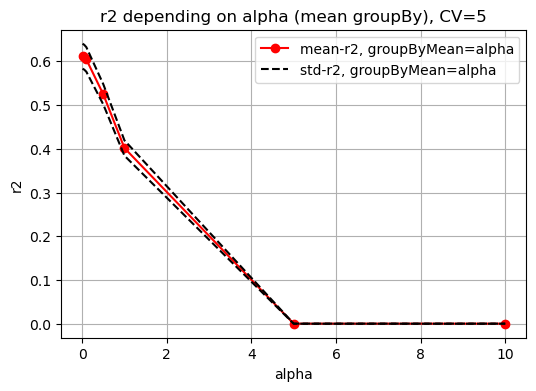

In [360]:
Lasso_CV.plot_score(groupBy='alpha')

In [363]:
Lasso_CV.score_table()

,alpha,fit_time,r2,rmse
0,0.01,0.052 ± 0.002,0.612 ± 0.029,2.296 ± 0.139
1,0.05,0.043 ± 0.004,0.610 ± 0.028,2.303 ± 0.138
2,0.10,0.042 ± 0.003,0.604 ± 0.028,2.318 ± 0.137
3,0.50,0.034 ± 0.002,0.525 ± 0.023,2.541 ± 0.122
4,1.00,0.031 ± 0.001,0.402 ± 0.018,2.851 ± 0.113
5,5.00,0.027 ± 0.001,0.000 ± 0.000,3.685 ± 0.095
6,10.00,0.029 ± 0.002,0.000 ± 0.000,3.685 ± 0.095


**ElasticNet (L1 + L2) :**

In [365]:
ElasticModel = ElasticNet()

param_grid = {
    "alpha":[0.01, 0.1, 1.0, 10],
    "l1_ratio":[0.01, 0.1, 0.25, 0.5, 0.8, 1.0]
}

Elastic_CV = GridSearchAnalysis(ElasticModel, Xtrain, Ytrain, scoring, param_grid=param_grid)

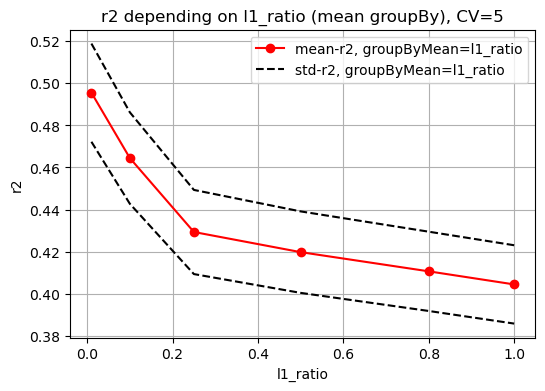

In [366]:
Elastic_CV.plot_score(groupBy='l1_ratio')

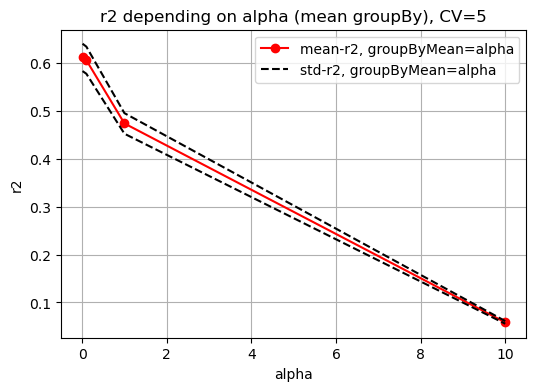

In [367]:
Elastic_CV.plot_score(groupBy='alpha')

In [368]:
Elastic_CV.score_table()

,alpha,l1_ratio,fit_time,r2,rmse
0,0.01,0.01,0.070 ± 0.003,0.611 ± 0.029,2.297 ± 0.139
1,0.01,0.10,0.070 ± 0.032,0.611 ± 0.029,2.297 ± 0.139
2,0.01,0.25,0.057 ± 0.003,0.612 ± 0.029,2.297 ± 0.139
3,0.01,0.50,0.058 ± 0.002,0.612 ± 0.029,2.297 ± 0.139
4,0.01,0.80,0.054 ± 0.005,0.612 ± 0.029,2.296 ± 0.139
5,0.01,1.00,0.050 ± 0.002,0.612 ± 0.029,2.296 ± 0.139
6,0.10,0.01,0.041 ± 0.002,0.606 ± 0.029,2.313 ± 0.139
7,0.10,0.10,0.039 ± 0.002,0.606 ± 0.028,2.312 ± 0.138
8,0.10,0.25,0.039 ± 0.002,0.606 ± 0.028,2.312 ± 0.138
9,0.10,0.50,0.040 ± 0.002,0.606 ± 0.028,2.314 ± 0.138


L'ajout de régularisation n'a pas grande influence sur la prévision et dégrade la métrique d'évaluation pour des valeurs de paramètres élevés : effet déjà régularisateur du grand nombre de données accessibles.

### 2.3 Modèles additifs

### 2.4 Ensembles

**Forêt aléatoire :**

In [46]:
#### TRES LONG (~ 15min) ####

from sklearn.ensemble import RandomForestRegressor

RFModel = RandomForestRegressor()

param_grid = {
    
    'n_estimators': [50],                            # Nombre d'arbres dans la forêt
    'max_depth': [8, 10, 12, 14],             # Profondeur maximale de l'arbre
    'min_samples_split': [100, 200, 400],   # taille minimale de découpage d'un noeud
    'bootstrap':[True]                               # bootstrapping des échantillons
 
}

RFModel_CV = GridSearchAnalysis(RFModel, Xtrain, Ytrain, scoring, param_grid=param_grid)

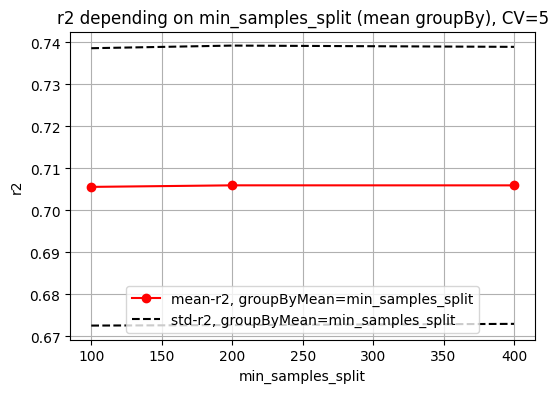

In [47]:
RFModel_CV.plot_score(groupBy='min_samples_split')

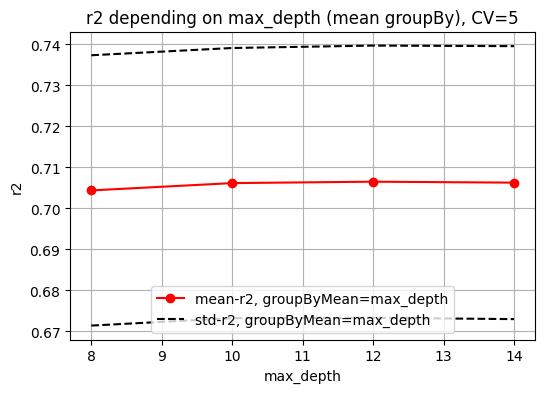

In [48]:
RFModel_CV.plot_score(groupBy='max_depth')

In [49]:
RFModel_CV.score_table()

,n_estimators,max_depth,min_samples_split,bootstrap,fit_time,r2,rmse
0,50,8,100,True,16.423 ± 1.764,0.704 ± 0.033,2.003 ± 0.157
1,50,8,200,True,16.364 ± 0.563,0.704 ± 0.033,2.003 ± 0.158
2,50,8,400,True,16.862 ± 1.016,0.704 ± 0.033,2.003 ± 0.158
3,50,10,100,True,16.872 ± 0.367,0.706 ± 0.033,1.997 ± 0.158
4,50,10,200,True,17.716 ± 0.717,0.706 ± 0.033,1.997 ± 0.158
5,50,10,400,True,20.327 ± 2.223,0.706 ± 0.033,1.997 ± 0.158
6,50,12,100,True,22.210 ± 1.239,0.706 ± 0.033,1.997 ± 0.158
7,50,12,200,True,21.781 ± 0.548,0.707 ± 0.033,1.995 ± 0.159
8,50,12,400,True,19.653 ± 1.582,0.707 ± 0.033,1.995 ± 0.159
9,50,14,100,True,22.099 ± 2.018,0.706 ± 0.033,1.998 ± 0.159


### 2.5 XgBoost

### 2.6 SVR

### 2.7 Mélange

**Regression linéaire + random forest sur les résidus :**

In [301]:
from sklearn.base import BaseEstimator, RegressorMixin
from sklearn.ensemble import RandomForestRegressor

# Regression linéaire + Random forest sur les résidus
class LmRf(BaseEstimator, RegressorMixin):
    
    def __init__(self, n_estimators=5, max_depth=8, min_samples_split=100, bootstrap=True, random_state=None):
        
        self.n_estimators = n_estimators
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.bootstrap = bootstrap
        self.random_state = random_state
        
        self.lm = LinearRegression()
        self.rf = RandomForestRegressor(
            
            n_estimators = self.n_estimators, 
            max_depth = self.max_depth, 
            min_samples_split = self.min_samples_split,
            bootstrap = self.bootstrap,
            random_state = self.random_state,
        
        )

    def fit(self, X, y):
        # Ajuster le modèle Ridge
        self.lm.fit(X, y)
        # Calculer les résidus
        residuals = y - self.lm.predict(X)
        # Ajuster le modèle RandomForest sur les résidus
        self.rf.fit(X, residuals)
        return self

    def predict(self, X):
        # Prédire avec le modèle Ridge
        lm_preds = self.lm.predict(X)
        # Prédire les résidus avec le modèle RandomForest
        rf_preds = self.rf.predict(X)
        # Combiner les prédictions
        return lm_preds + rf_preds

## 3. Soumissions

**1) best_rf : public score = 0.69302**

In [46]:
from sklearn.ensemble import RandomForestRegressor

best_rf = RandomForestRegressor(n_estimators = 100, max_depth = 10, min_samples_split = 100, bootstrap = True)

best_rf.fit(Xtrain, Ytrain)

Ypred = np.maximum(0.0, best_rf.predict(Xtest)) # prendre une valeur au minimum de zéro (on sait que le montant est positif p.s.)

submit_model('best_rf', Ypred, test)

**2) best_rf2 : public score = 0.69614**

In [26]:
from sklearn.ensemble import RandomForestRegressor

best_rf2 = RandomForestRegressor(n_estimators = 100, max_depth = 14, min_samples_split = 200, bootstrap = True)

best_rf2.fit(Xtrain, Ytrain)

Ypred = np.maximum(0.0, best_rf2.predict(Xtest))

submit_model('best_rf2', Ypred, test)

**2) GAM + RF : public score = 0.45675**


GAM + RF faite sur R. Reformatage du fichier de soumission grâce à pandas.

In [2]:
res_GAMRF = pd.read_parquet("predictions/GAMRF.parquet")  
res_GAMRF

,row_ID,tip_amount
0,1,1.527160
1,2,2.615247
2,3,-0.080727
3,4,2.099159
4,5,0.018646
...,...,...
2627158,2627159,0.061338
2627159,2627160,4.158604
2627160,2627161,2.313959
2627161,2627162,2.998502


In [6]:
submit_model('gamrf_best1', res_GAMRF['tip_amount'], test)